# Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
df.shape

(25, 2)

In [7]:
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(df,test_size=0.7,random_state=0)
print(df_test.shape)
print(df_train.shape)

(18, 2)
(7, 2)


In [9]:
from sklearn.preprocessing import MinMaxScaler
rescale=MinMaxScaler()
num_features=['Hours','Scores']
norm_train_data=rescale.fit_transform(df_train.loc[:,num_features])
print(norm_train_data.shape,type(norm_train_data))

(7, 2) <class 'numpy.ndarray'>


In [14]:
norm_train_data

array([[0.46875   , 0.52702703],
       [0.03125   , 0.12162162],
       [0.9375    , 0.72972973],
       [0.        , 0.        ],
       [0.359375  , 0.44594595],
       [1.        , 1.        ],
       [0.3125    , 0.27027027]])

In [13]:
df_train=pd.DataFrame(norm_train_data,columns=num_features)
df_train

,Hours,Scores
0,0.468750,0.527027
1,0.031250,0.121622
2,0.937500,0.729730
3,0.000000,0.000000
4,0.359375,0.445946
5,1.000000,1.000000
6,0.312500,0.270270


In [15]:
X_train=np.array(df_train['Hours'])
y_train=np.array(df_train['Scores'])

In [16]:
def gradient(X,y,learning_rate=0.0001,iters=1000,m_curr=0,c_curr=0):
  N=float(len(y))
  grad=pd.DataFrame(columns=['slope','intercept','mse'])
  for i in range(iters):
    y_pred=(m_curr*X)+c_curr
    mse= sum([error**2 for error in(y-y_pred)])/N
    derivative_m=(-2/N)*sum(X*(y-y_pred))
    derivative_c=(-2/N)*sum((y-y_pred))
    m_curr=m_curr-(learning_rate*derivative_m)
    c_curr=c_curr-(learning_rate*derivative_c)
    grad.loc[i]=[m_curr,c_curr,mse]
  return grad

In [17]:
grad=gradient(X_train,y_train,0.1)
grad.tail()

,slope,intercept,mse
995,0.851717,0.063755,0.006171
996,0.851717,0.063755,0.006171
997,0.851717,0.063755,0.006171
998,0.851717,0.063755,0.006171
999,0.851717,0.063755,0.006171


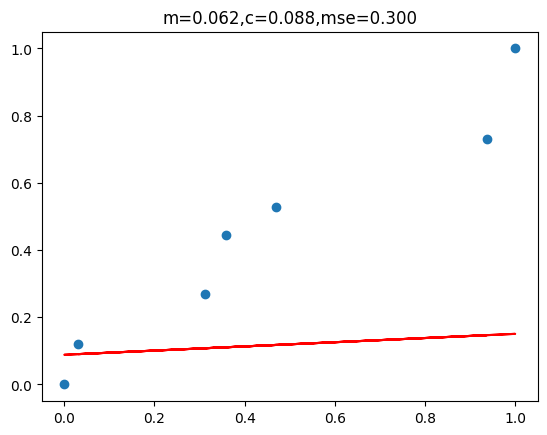

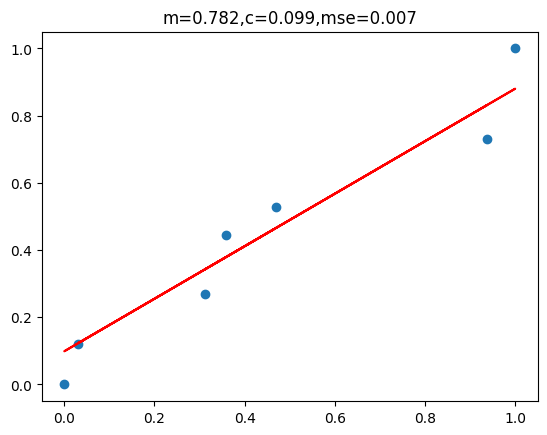

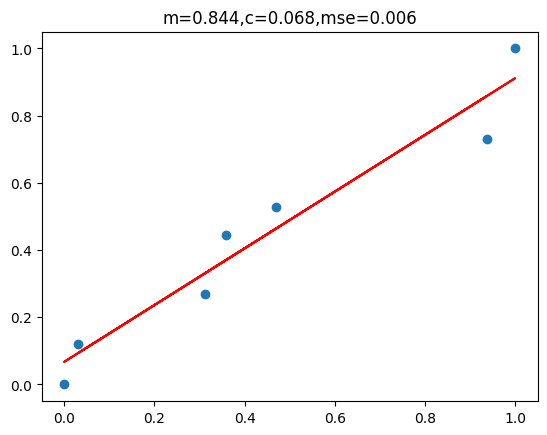

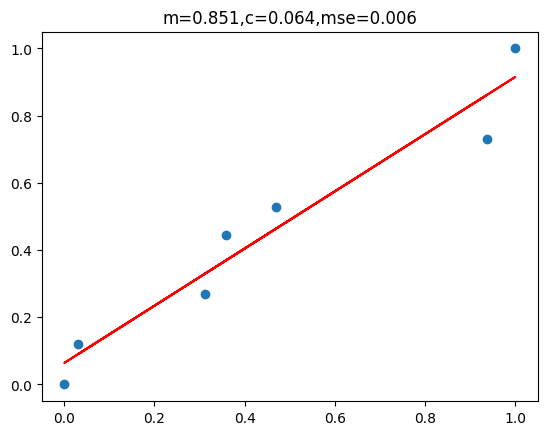

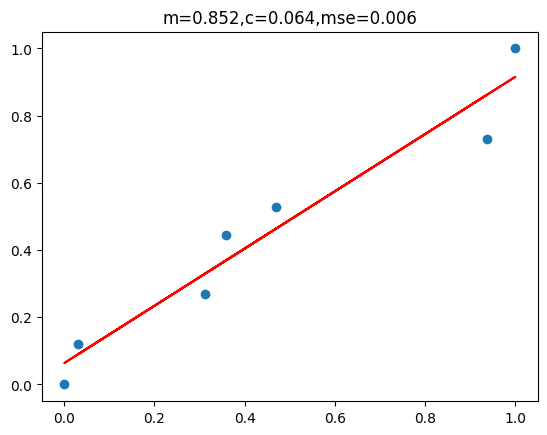

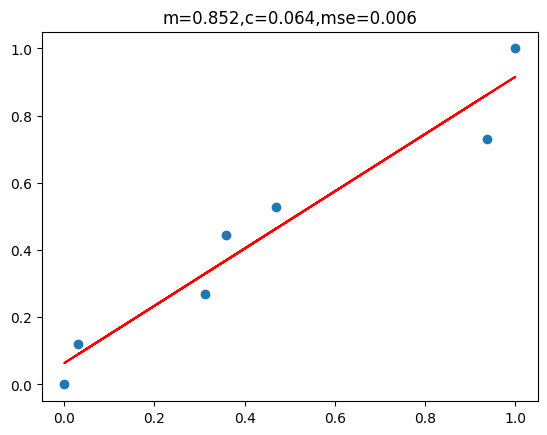

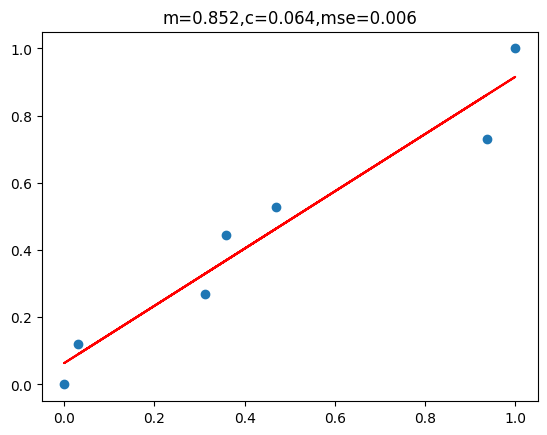

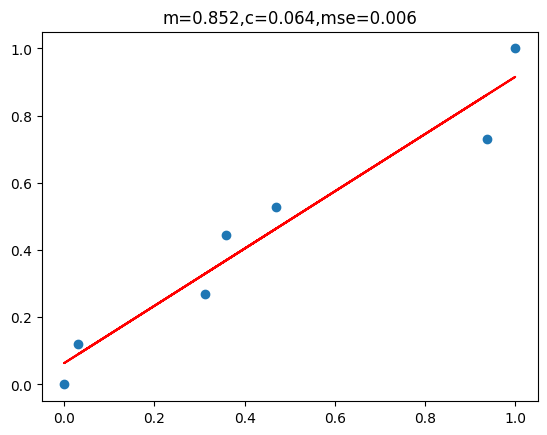

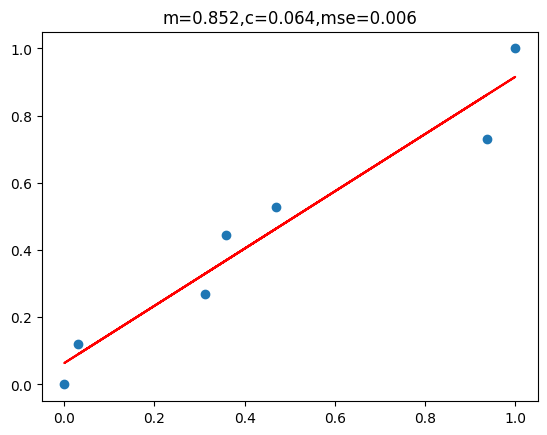

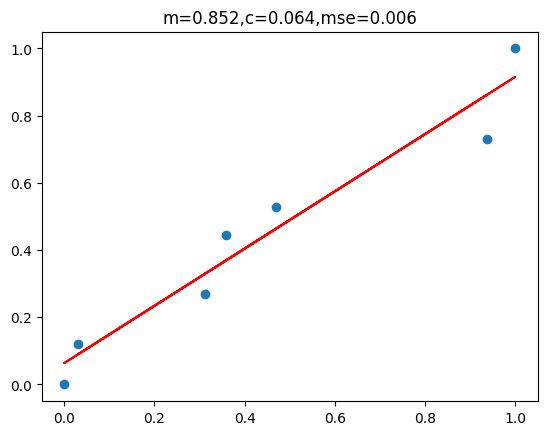

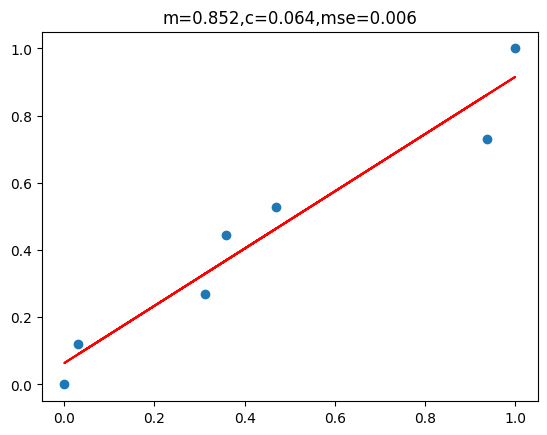

In [19]:
import time
for i in range(0,grad.shape[0],99):
  plt.scatter(X_train,y_train)
  plt.plot(X_train,grad.iloc[i,1]+grad.iloc[i,0]*X_train,'r')
  plt.title("m=%.3f,c=%.3f,mse=%.3f"%(grad.iloc[i,0],grad.iloc[i,1],grad.iloc[i,2]))
  plt.show()
  time.sleep(1)

In [20]:
grad.tail()

,slope,intercept,mse
995,0.851717,0.063755,0.006171
996,0.851717,0.063755,0.006171
997,0.851717,0.063755,0.006171
998,0.851717,0.063755,0.006171
999,0.851717,0.063755,0.006171
